# Fantasy Football

In [ ]:
%pip install requests

In [6]:
import requests
import pandas as pd

In [7]:
swid ='{ 0B9D34C5-07DA-4BA4-9D34-C507DA8BA44C }'
espn_s2 = 'AEAJJ9VCHr%2Bj1P5tm%2BrYgx8fG4Kwzl4%2BBDI%2B%2F7ZjKKQxNSJ44%2BmM9QY6pFpXP636Mfp36GHhvvu96DshKBMNcuk3cXXsNXVYZhDTZawi4hITh%2BuLnJHigarjRyANweqUh05VQYYwMVjjwC1BLFT7jnAyWr0Kx9dM63jLpstXy2iRmwAjVvR%2BW02dhEYckOtQA9lyQXS6%2B0tV4c5NZvCDPrN85%2F0GneG1hDZNV%2FEUH76CesKV5manJkX9NCD03R6mKHk6SQBuT2ugOti1R0w%2BRPCd'

In [8]:
league_id = 1573528230
season = '2023'
week = 1

In [9]:
url = f'https://fantasy.espn.com/apis/v3/games/ffl/seasons/{season}/segments/0/leagues/{league_id}?view=mMatchup&view=mMatchupScore'

In [10]:
r = requests.get(url,
                 params={ 'scoringPeriodId': week },
                 cookies={ 'SWID': swid, 'espn_s2': espn_s2 })

espn_raw_data = r.json()

## Saving JSON Response to a Pandas Dataframe

### Accessing Nested JSON Data

In [58]:
columns = ['Team', 'Player', 'Slot', 'Position', 'Projected', 'Actual']

In [59]:
# Get a single team
team = espn_raw_data['teams'][1]
team_id = team['id']

team_id

2

In [60]:
# get team names
team_abbrev = {
    1: 'HELL',
    2: 'NYTP',
    3: 'CRES',
    4: 'BROW',
    5: 'RBB',
    6: 'DHIL',
    7: 'ceck',
    8: 'DURH',
    9: 'BTL',
    10: 'Amon'
}

In [61]:
team_owner = team_abbrev[team_id]
print(team_owner)

NYTP


In [62]:
# loop over all the players in the teams roster
for player in team['roster']['entries']:
    print(player['playerPoolEntry']['player']['fullName'])
    print(player['lineupSlotId'])

Josh Allen
0
Saquon Barkley
2
Joe Mixon
2
Mark Andrews
6
Patriots D/ST
20
Justin Tucker
17
Mike Williams
4
Jalin Hyatt
20
Christian Kirk
23
David Montgomery
20
Jakobi Meyers
4
Gabe Davis
20
Bills D/ST
16
Matthew Stafford
20
Tyler Boyd
20
Devin Singletary
20


In [63]:
# make sure these map to my roster settings
eligible_positions = {
    0: 'QB',
    2: 'RB',
    4: 'WR',
    6: 'TE',
    16: 'D/ST',
    17: 'K',
    20: 'Bench',
    23: 'Flex'
}

In [64]:
# loop over every player on the teams roster
for player in team['roster']['entries']:
    print(player['playerPoolEntry']['player']['fullName'])
    print(player['lineupSlotId'])
    lineup_slot = player['lineupSlotId']
    print(eligible_positions[lineup_slot])

Josh Allen
0
QB
Saquon Barkley
2
RB
Joe Mixon
2
RB
Mark Andrews
6
TE
Patriots D/ST
20
Bench
Justin Tucker
17
K
Mike Williams
4
WR
Jalin Hyatt
20
Bench
Christian Kirk
23
Flex
David Montgomery
20
Bench
Jakobi Meyers
4
WR
Gabe Davis
20
Bench
Bills D/ST
16
D/ST
Matthew Stafford
20
Bench
Tyler Boyd
20
Bench
Devin Singletary
20
Bench


## Projected and Actual Points

In [65]:
# For a single player
team = espn_raw_data['teams'][1]
player = team['roster']['entries'][0]
player_name = player['playerPoolEntry']['player']['fullName']
print(player_name)

Josh Allen


In [66]:
actual = 0
projected = 0

for stats in player['playerPoolEntry']['player']['stats']:
    # skip the rows where the scoring period does not mater up with the current week
    if stats['scoringPeriodId'] != week:
        continue
    # if the source id = 0 then these are actual stats
    if stats['statSourceId'] == 0:
        actual = stats['appliedTotal']
    elif stats['statSourceId'] == 1:
        projected = stats['appliedTotal']

print(player_name)
print(actual or 0)
print(projected)

Josh Allen
0
0


In [67]:
team = espn_raw_data['teams'][1]
for player in team['roster']['entries']:
    player_name = player['playerPoolEntry']['player']['fullName']
    # get the projected and actual points
    projected = None,
    actual = None
    # loop over the stats for each player
    for stats in player['playerPoolEntry']['player']['stats']:
        # skip the rows where the scoring period does not match up with the current week
        if stats['scoringPeriodId'] != week:
            continue
        if stats['statSourceId'] == 0:
            actual = stats['appliedTotal']
        elif stats['statSourceId'] == 1:
            projected = stats['appliedTotal']
        
    print(player_name)
    print(actual or 0)
    print(projected)

Josh Allen
0
(None,)
Saquon Barkley
0
(None,)
Joe Mixon
0
(None,)
Mark Andrews
0
(None,)
Patriots D/ST
0
(None,)
Justin Tucker
0
(None,)
Mike Williams
0
(None,)
Jalin Hyatt
0
(None,)
Christian Kirk
0
(None,)
David Montgomery
0
(None,)
Jakobi Meyers
0
(None,)
Gabe Davis
0
(None,)
Bills D/ST
0
(None,)
Matthew Stafford
0
(None,)
Tyler Boyd
0
(None,)
Devin Singletary
0
(None,)


In [68]:
# Create an empty list to append data to
projection_data = []

for week in range(1, 15): # change to 18 to include playoffs
    print('Week', week)
    
    # get the raw data
    r = requests.get(url,
                     params={ 'scoringPeriodId': week },
                     cookies={ 'SWID': swid, 'espn_s2': espn_s2 })
    
    espn_raw_data = r.json()
    
    # loop over each team in the request
    for team in espn_raw_data['teams']:
        # get the team_id so we can map it to team_names
        team_id = team['id']
        # create a new column with the team_abbrev using the team_id as the key
        team_owner = team_abbrev[team_id]
        # loop over every player on the team roster
        for player in team['roster']['entries']:
            player_name = player['playerPoolEntry']['player']['fullName']
            lineup_slot = player['lineupSlotId']
            # create a new column with the position using the lineup_slot as the key
            position = eligible_positions[lineup_slot]
            
            #get the projected and actual points
            projected = None
            actual = None
            # loop over the stats for each player
            for stats in player['playerPoolEntry']['player']['stats']:
                # skip the rows where the scoring period does not match up with the current week
                if stats['scoringPeriodId'] != week:
                    continue
                if stats['statSourceId'] == 0:
                    actual = stats['appliedTotal']
                elif stats['statSourceId'] == 1:
                    projected = stats['appliedTotal']
                    
            # append all the data to the empty list
            projection_data.append([
                week,
                team_owner,
                player_name,
                lineup_slot,
                position,
                projected,
                actual
            ])
            
print('Done getting projected & actual stats')

Week 1
Week 2
Week 3
Week 4
Week 5
Week 6
Week 7
Week 8
Week 9
Week 10
Week 11
Week 12
Week 13
Week 14
Done getting projected & actual stats


In [69]:
df = pd.DataFrame(projection_data,
                  columns=['Week',
                           'Team',
                           'Player',
                           'Lineup Slot',
                           'Position',
                           'Projected',
                           'Actual'])

# sample ten random rows
df.fillna(0)
df.sample(10)

,Week,Team,Player,Lineup Slot,Position,Projected,Actual
947,6,Amon,Calvin Ridley,23,Flex,NaN,None
9,1,HELL,George Pickens,20,Bench,10.776597,None
530,4,BROW,Jalen Hurts,0,QB,NaN,None
996,7,CRES,Jahmyr Gibbs,2,RB,NaN,None
469,3,Amon,Trevor Lawrence,0,QB,NaN,None
1957,13,CRES,Chris Godwin,20,Bench,NaN,None
2088,14,HELL,Michael Pittman Jr.,20,Bench,NaN,None
1749,11,Amon,Trevor Lawrence,0,QB,NaN,None
865,6,RBB,Lamar Jackson,0,QB,NaN,None
399,3,RBB,Jake Elliott,20,Bench,NaN,None


## Plotting Actual vs Projected for a Team

In [70]:
import matplotlib.pyplot as plt

In [71]:
# filter out bench for projection purposes. D/ST can break this
starters_df = df[~df['Position'].isin(['Bench'])]

In [72]:
# fillna so we dont hit any errors when grouping data
starters_df = starters_df.fillna(0)
starters_df.sample(5)

,Week,Team,Player,Lineup Slot,Position,Projected,Actual
1676,11,RBB,Evan McPherson,17,K,0.0,0
1538,10,ceck,Travis Etienne Jr.,23,Flex,0.0,0
943,6,BTL,Tyler Bass,17,K,0.0,0
1346,9,RBB,Jaylen Waddle,4,WR,0.0,0
1779,12,NYTP,Mark Andrews,6,TE,0.0,0


In [73]:
# Confirm projected and actual are floats
starters_df.dtypes

Week             int64
Team            object
Player          object
Lineup Slot      int64
Position        object
Projected      float64
Actual           int64
dtype: object

### Pick One Team and Plot Their Season by Week

In [74]:
# filter down and select only the one teams starters
team_starters_df = starters_df[starters_df['Team'] == 'NYTP']

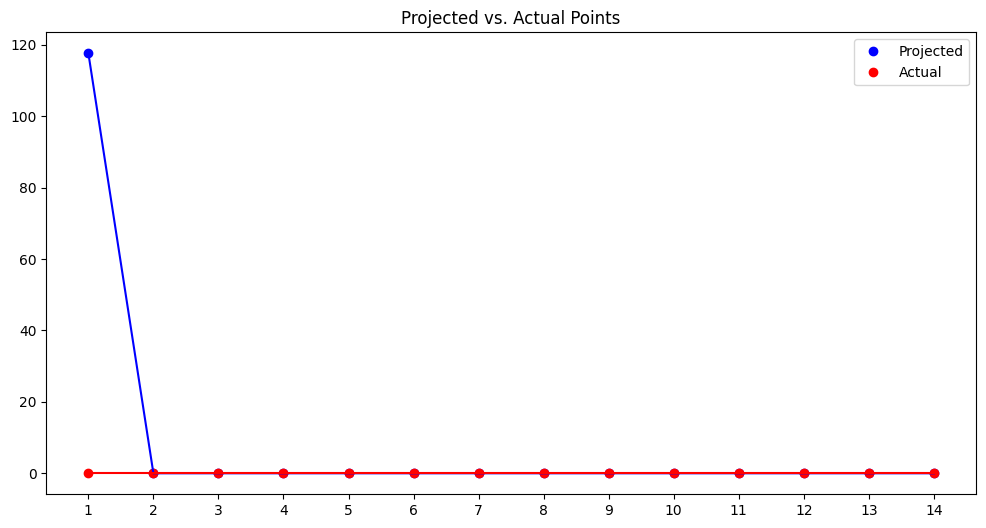

In [75]:
# Select the 'Week' and 'value' columns from the groupby object
plot_data = team_starters_df[['Week', 'Projected', 'Actual']].groupby(['Week']).sum().reset_index()

# set the figure size and create the plot
plt.figure(figsize=(12,6))
plt.plot(plot_data['Week'], plot_data['Projected'], 'bo', label='Projected')
plt.plot(plot_data['Week'], plot_data['Actual'], 'ro', label='Actual')
plt.plot(plot_data['Week'], plot_data['Projected'], 'b-')
plt.plot(plot_data['Week'], plot_data['Actual'], 'r-')

# add a legend and show the plot
plt.title('Projected vs. Actual Points')
plt.legend()
plt.xticks(plot_data['Week'])
plt.show()

In [76]:
# Create a function to do it for each team
# this will only work with bench players filtered out
def plot_team(df, team_abbrev):
    # filter and select only the one teams starters
    df2 = df[df['Team'] == team_abbrev]
    

    # Select the 'Week' and 'value' columns from the groupby object
    plot_data = df2[['Week', 'Projected', 'Actual']].groupby(['Week']).sum().reset_index()

    # set the figure size and create the plot
    plt.figure(figsize=(12,6))
    plt.plot(plot_data['Week'], plot_data['Projected'], 'bo', label='Projected')
    plt.plot(plot_data['Week'], plot_data['Actual'], 'ro', label='Actual')
    plt.plot(plot_data['Week'], plot_data['Projected'], 'b-')
    plt.plot(plot_data['Week'], plot_data['Actual'], 'r-')

    # add a legend and show the plot
    plt.title('Projected vs. Actual Points')
    plt.legend()
    plt.xticks(plot_data['Week'])
    plt.show()

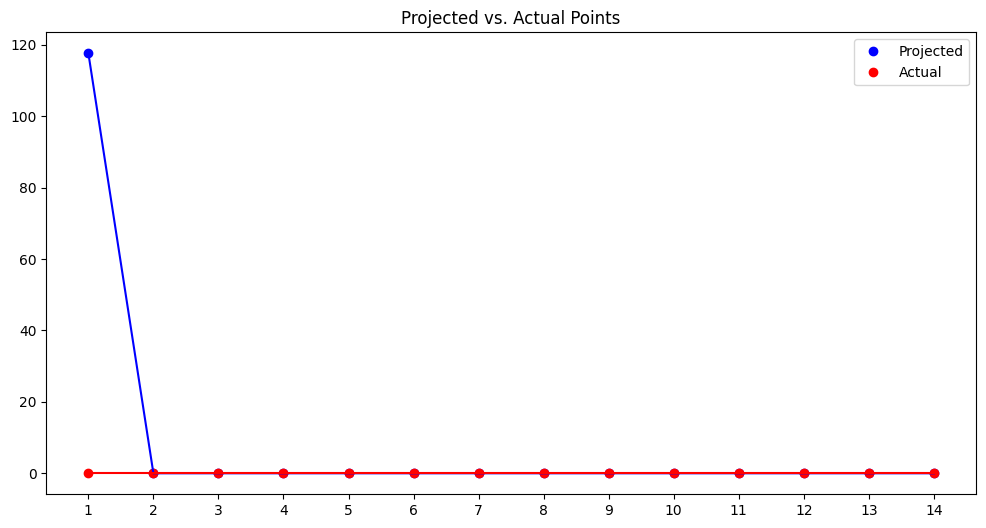

In [78]:
plot_team(starters_df, 'NYTP')

## Quantifying the Difference in Projections & Actuals

In [79]:
# create a function to get the difference of projections and actuals
def calc_difference(df):
    return df['Projected'].sum() - df['Actual'].sum()

In [80]:
# use the starters df and groupby team and apply the function
team_df = starters_df.groupby(['Team']).apply(calc_difference)

In [81]:
# print
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(round(team_df), 2)

Team
Amon    125.0
BROW    108.0
BTL     106.0
CRES    124.0
DHIL    129.0
DURH    129.0
HELL    132.0
NYTP    118.0
RBB     121.0
ceck     82.0
dtype: float64 2


In [82]:
# Sort best to worst
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(round(team_df.sort_values()), 2)

Team
ceck     82.0
BTL     106.0
BROW    108.0
NYTP    118.0
RBB     121.0
CRES    124.0
Amon    125.0
DURH    129.0
DHIL    129.0
HELL    132.0
dtype: float64 2


### Breakdown by Week, Position, and Player

In [83]:
weekly_final_df = starters_df.groupby(['Team', 'Week']).apply(calc_difference)
position_df = starters_df.groupby(['Team', 'Position']).apply(calc_difference)
player_df = starters_df.groupby(['Team', 'Player']).apply(calc_difference)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(round(weekly_final_df), 2)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(round(position_df), 2)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(round(player_df), 2)

In [85]:
nytp_player_df = starters_df[starters_df['Team'] == 'NYTP'].groupby(['Player']).apply(calc_difference)

In [86]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(round(nytp_player_df), 2)

Player
Bills D/ST         6.0
Christian Kirk    12.0
Jakobi Meyers     11.0
Joe Mixon         15.0
Josh Allen        21.0
Justin Tucker      9.0
Mark Andrews      13.0
Mike Williams     13.0
Saquon Barkley    17.0
dtype: float64 2


## Advanced Plotting

In [87]:
slotcodes = {
    0: 'QB', 1: 'QB',
    2: 'RB', 3: 'RB',
    4: 'WR', 5: 'WR',
    6: 'TE',
    16: 'D/ST',
    17: 'K',
    20: 'Bench',
    23: 'Flex'
}

In [88]:
def get_matchups(league_id, season, week, swid='', espn_s2=''):
    '''
    Pull full JSON of matchup data from ESPN API for a particular week
    '''
    
    url = f'http://fantasy.espn.com/apis/v3/games/ffl/seasons/{season}/segments/0/leagues/{league_id}'
    
    r = requests.get(url + '?view=mMatchup&view=mMatchupScore',
                     params={ 'scoringPeriodId': week, 'matchupPeriodId': week },
                     cookies={ 'SWID': swid, 'espn_s2': espn_s2})
    
    return r.json()

In [89]:
def get_slates(json):
    '''
    Constructs week team slates with slotted position,
    position, and points (actual and ESPN projected),
    given full matchup info (`get_matchups')
    '''
    
    slates = {}
    
    for team in d['teams']:
        slate = []
        for p in team['roster']['entries']:
            # get name
            name = p['playerPoolEntry']['player']['fullName']
            
            # get actual lineup slot
            slotid = p['lineupSlotId']
            slot = slotcodes[slotid]
            
            # get projected and actual scores
            act, proj = 0, 0
            for stat in p['playerPoolEntry']['player']['stats']:
                if stat['scoringPeriodId'] != week:
                    continue
                if stat['statSourceId'] == 0:
                    act = stat['appliedTotal']
                elif stat['statSourceId'] == 1:
                    proj = stat['appliedTotal']
                else:
                    print('Error')
            
            # get type of player
            pos = 'Unk'
            ess = p['playerPoolEntry']['player']['eligibleSlots']
            if 0 in ess: pos = 'QB'
            elif 2 in ess: pos = 'RB'
            elif 4 in ess: pos = 'WR'
            elif 6 in ess: pos = 'TE'
            elif 16 in ess: pos = 'D/ST'
            elif 17 in ess: pos = 'K'
            
            slate.append([name, slotid, slot, pos, act, proj])
            
        slate = pd.DataFrame(slate, columns=['Name', 'SlotID', 'Slot', 'Pos', 'Actual', 'Proj'])
        slates[team['id']] = slate
        
    return slates

In [90]:
# Modified code to just focus on actual projected to start
def compute_pts(slates, posns, struc):
    '''
    Given slates (`get_slates`), compute total roster pts:
    actual and projected using ESPN
    
    Parameters
    ---------------
    slates : `dict` of `DataFrames`
        (from `get_slates`)
    posns : `list`
        roster positions, e.g. ['QB', 'RB', 'WR', 'TE']
    struc : `list`
        slots per position, e.g. [1, 2, 2, 1]
        
    * This is not flexible enough to handler "weird" leagues
    like 6 Flex slots with constraints on # total RB/WR
    
    Returns
    ---------------
    `dict` of `dict`s with actual, projected points
    '''
    
    data = {}
    for tmid, slate in slates.items():
        pts = { 'epts': 0, 'apts': 0 }
        # ACTUAL STARTERS
        pts['apts'] = slate.query('Slot not in ["Bench", "IR"]').filter(['Actual']).sum().values[0]
        # PROJECTED STARTERS
        pts['epts'] = slate.query('Slot not in ["Bench", "IR"]').filter(['Proj']).sum().values[0]
        
        data[tmid] = pts
        
    return data

In [91]:
def get_teamnames(league_id, season, week, swid='', espn_s2=''):
    url = 'https://fantasy.espn.com/apis/v3/games/ffl/seasons/' + \
      str(season) + '/segments/0/leagues/' + str(league_id)
    
    r = requests.get(url + '?view=mTeam',
                  params={'scoringPeriodId': week},
                  cookies={"SWID": swid, "espn_s2": espn_s2})
    d = r.json()
    
    tm_names = {tm['id']: tm['location'].strip() + ' ' + tm['nickname'].strip() \
                for tm in d['teams']}
    
    return tm_names

In [92]:
# Only plot actual and projected for a given week
def plot_week(d, data, week, tm_names, nummatchups=6,
              minx=70, maxx=200, legend=4):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # hardcoded plot adjustments
    dif, offset = 5, 2
    
    # for y-axis tick labels
    tmlist, tmticks, tmbold = [], [], []
    
    cury = 0
    for g in d['schedule'][:nummatchups]:
        aid, anm = -1, ''
        hid, hnm = -1, ''
        try:
            aid = g['away']['teamId']
            anm = tm_names[aid]
            hid = g['home']['teamId']
            hnm = tm_names[hid]
        except:
            continue
            
        tmlist.append(anm)
        tmlist.append(hnm)
        
        if data[aid]['apts'] > data[hid]['apts']:
            tmbold.extend([1,0])
        else:
            tmbold.extend([0,1])
            
        for pts in [data[aid], data[hid]]:
            #h = 1 if (pts['opts']-offset) > pts['apts'] else 0
            tmticks.append(cury)
            ax.plot([minx, maxx], [cury, cury], 'k--', linewidth=1, alpha=0.1)
            #ax.plot([pts['apts'], pts['opts']-offset*h], [cury, cury], 'k-')
            ax.scatter(pts['epts'], cury, c='w', s=200, marker='o', edgecolor='g')
            ax.scatter(pts['epts'], cury, c='w', s=100)
            
            cury += dif
            
        cury += 2*dif
    
    # setting y-axis
    ax.set(yticks=tmticks, yticklabels=tmlist)
    
    for k, tick in enumerate(ax.yaxis.get_major_ticks()):
        if tmbold[k] == 1:
            tick.label1.set_fontweight('bold')
            
    # legend stuff
    ax.scatter([], [], c='k', s=100, label='Actual')
    ax.scatter([], [], c='w', s=200, marker='o', edgecolor='g', label='ESPN')
    # ax.scatter([], [], c='b', s=100, alpha=0.2, label='Best Possible')
    ax.legend(loc=legend, borderaxespad=2, borderpad=1, labelspacing=1.5, shadow=True, fontsize=12)
    
    ax.set(title='week %d' % week)
    
    return ax

In [93]:
league_id = 1573528230
season = 2023
week = 1
posns = ['QB', 'RB', 'WR', 'Flex', 'TE', 'D/ST', 'K']
struc = [1, 2, 2, 1, 1, 1, 1]

d      = get_matchups(league_id, season, week, swid=swid, espn_s2=espn_s2)
slates = get_slates(d)
wdata  = compute_pts(slates, posns, struc)
tms    = get_teamnames(league_id, season, week, swid=swid, espn_s2=espn_s2)

In [94]:
# League Team Names
tms = {
    1: 'Jameson',
    2: 'New York Trash Pandas',
    3: 'Team Cresswell',
    4: 'Team Brown',
    5: 'Roc Bottom Bullies',
    6: 'Team Dhillon',
    7: 'Sugma',
    8: 'Team Durham',
    9: 'Blitz gang',
    10: 'Amon RA DOGGIN'
}

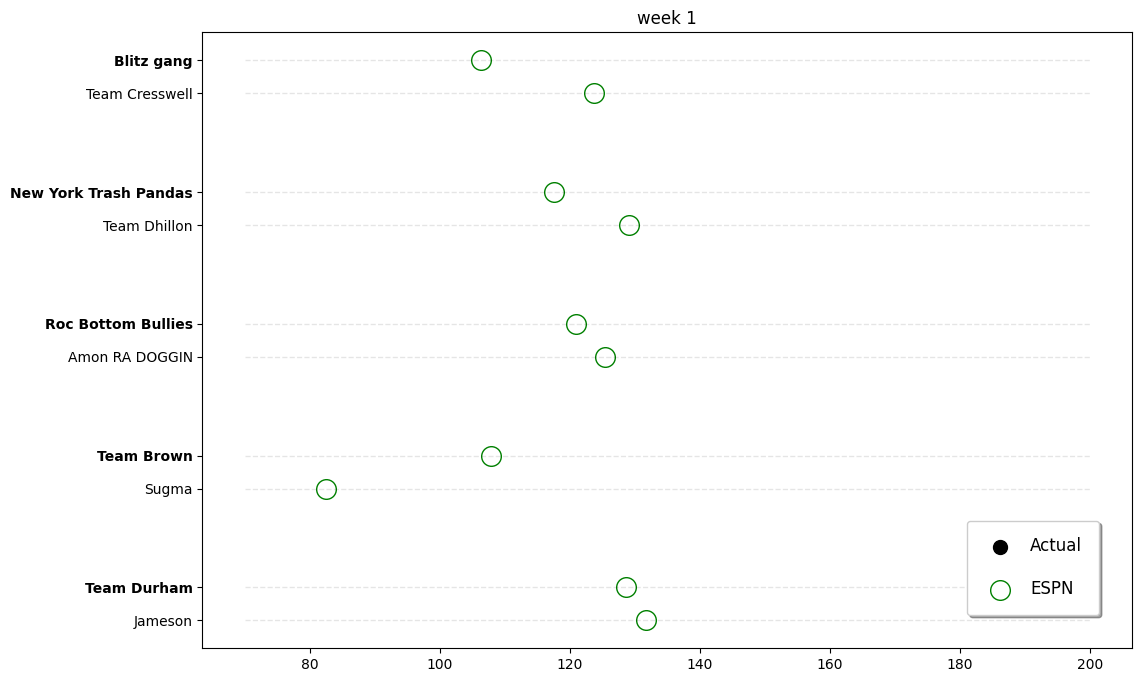

In [95]:
ax = plot_week(d, wdata, week, tms, nummatchups=5)
plt.show()

## Factoring in Optimal Lineup

In [96]:
def compute_pts(slates, posns, struc):
    '''
    ``dict` of `dict`s with actual, ESPN, optimal points
    '''
    
    data = {}
    for tmid, slate in slates.items():
        pts = { 'opts': 0, 'epts': 0, 'apts': 0 }
        
        # ACTUAL STARTERS
        pts['apts'] = slate.query('Slot not in ["Bench", "IR"]').filter(['Actual']).sum().values[0]
        
        # OPTIMAL and ESPNPROJ STARTERS
        for method, cat in [('Actual', 'opts'), ('Proj', 'epts')]:
            actflex = -100  # actual pts scored by flex
            proflex = -100 # 'proj' pts scored by flex
            
            # new code
            actop = -100
            proop = -100
            
            for pos, num in zip(posns, struc):
                # actual points, sorted by either actual or proj outcome
                t = slate.query('Pos == @pos').sort_values(by=method, ascending=False).filter(['Actual']).values[:,0]
                
                # projected points, sorted by either actual or proj outcome
                t2 = slate.query('Pos == @pos').sort_values(by=method, ascending=False).filter(['Proj']).values[:,0]
                
                # sum up points
                pts[cat] += t[:num].sum()
                
                # set the next best as flex
                if pos in ['RB', 'WR', 'TE'] and len(t) > num:
                    fn = t[num] if method=='Actual' else t2[num]
                    if fn > proflex:
                        actflex = t[num]
                        proflex = fn
                        
                # do the same for offensive positions
                if pos in ['QB', 'RB', 'WR', 'TE'] and len(t) > num:
                    fn = t[num] if method=='Actual' else t2[num]
                    if fn > proop:
                        actop = t[num]
                        proop = fn
                        
            pts[cat] += actop
            pts[cat] += actflex
            
        data[tmid] = pts
        
    return data

In [97]:
# Only plot actual and projected for a given week
def plot_week(d, data, week, tm_names, nummatchups=6,
              minx=70, maxx=200, legend=4):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # hardcoded plot adjustments
    dif, offset = 5, 2
    
    # for y-axis tick labels
    tmlist, tmticks, tmbold = [], [], []
    
    cury = 0
    for g in d['schedule'][:nummatchups]:
        aid, anm = -1, ''
        hid, hnm = -1, ''
        try:
            aid = g['away']['teamId']
            anm = tm_names[aid]
            hid = g['home']['teamId']
            hnm = tm_names[hid]
        except:
            continue
            
        tmlist.append(anm)
        tmlist.append(hnm)
        
        if data[aid]['apts'] > data[hid]['apts']:
            tmbold.extend([1,0])
        else:
            tmbold.extend([0,1])
            
        for pts in [data[aid], data[hid]]:
            h = 1 if (pts['opts']-offset) > pts['apts'] else 0
            tmticks.append(cury)
            ax.plot([minx, maxx], [cury, cury], 'k--', linewidth=1, alpha=0.1)
            ax.plot([pts['apts'], pts['opts']-offset*h], [cury, cury], 'k-')
            ax.scatter(pts['epts'], cury, c='w', s=200, marker='o', edgecolor='g')
            ax.scatter(pts['epts'], cury, c='w', s=100)
            
            # if optimal==actual, need to put blue inside black
            if pts['opts'] == pts['apts']:
                ax.scatter(pts['opts'], cury, c='w', s=25)
                ax.scatter(pts['opts'], cury, c='b', s=25, alpha=0.2)
            else:
                ax.scatter(pts['opts'], cury, c='b', s=100, alpha=0.2)
            
            cury += dif
            
        cury += 2*dif
    
    # setting y-axis
    ax.set(yticks=tmticks, yticklabels=tmlist)
    
    for k, tick in enumerate(ax.yaxis.get_major_ticks()):
        if tmbold[k] == 1:
            tick.label1.set_fontweight('bold')
            
    # legend stuff
    ax.scatter([], [], c='k', s=100, label='Actual')
    ax.scatter([], [], c='w', s=200, marker='o', edgecolor='g', label='ESPN')
    ax.scatter([], [], c='b', s=100, alpha=0.2, label='Best Possible')
    ax.legend(loc=legend, borderaxespad=2, borderpad=1, labelspacing=1.5, shadow=True, fontsize=12)
    
    ax.set(title='Week %d' % week)
    
    return ax

In [98]:
league_id = 1573528230
season = 2023
week = 1
posns = ['QB', 'RB', 'WR', 'Flex', 'TE', 'D/ST', 'K']
struc = [1, 2, 2, 1, 1, 1, 1]

d      = get_matchups(league_id, season, week, swid=swid, espn_s2=espn_s2)
slates = get_slates(d)
wdata  = compute_pts(slates, posns, struc)
tms    = get_teamnames(league_id, season, week, swid=swid, espn_s2=espn_s2)

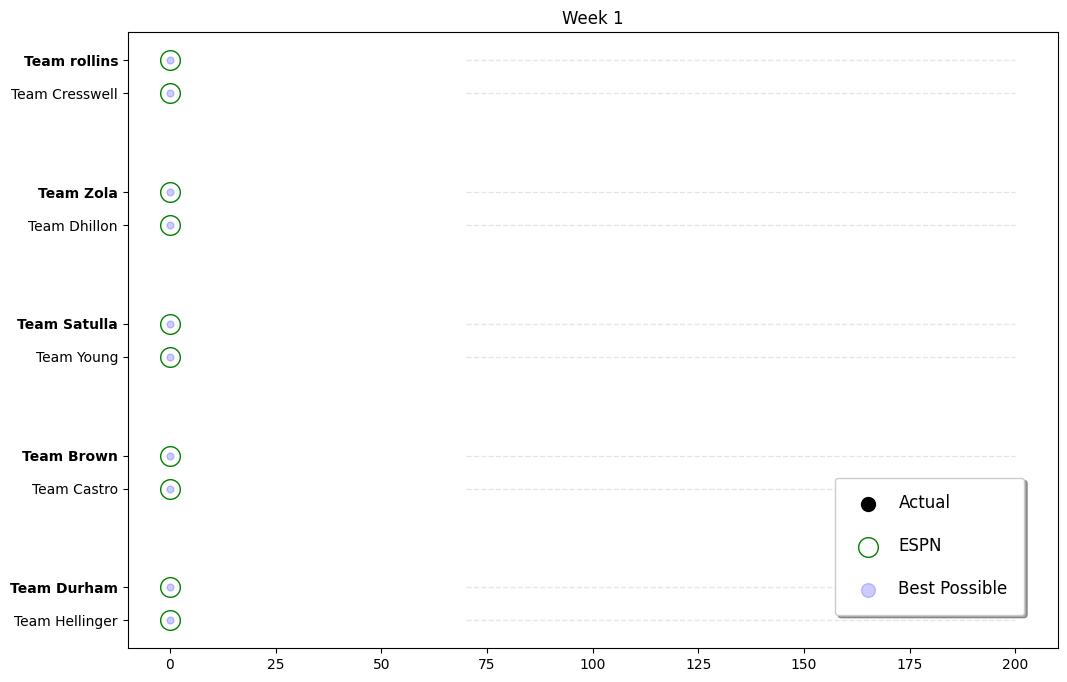

In [99]:
ax = plot_week(d, wdata, week, tms, nummatchups=5)
plt.show()